# Milestone2_AQQC_VisualAnalytics

In [26]:

import pandas as pd

import seaborn as sns

from pandas import json_normalize

import matplotlib.pyplot as plt

from datetime import datetime, date, time, timezone

import numpy as np

import csv

import re

In [27]:

def Milestone2_Get_OpenAQ_Dataset_Wrangling_utc_index(OpenAQ_Dataset_ImportAPI):

   format = '%Y-%m-%d %H:%M:%S'
    
   OpenAQ_Dataset_ImportAPI['date.utc'] = pd.to_datetime(OpenAQ_Dataset_ImportAPI['date.utc'], format=format).dt.tz_localize(None)

   OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI[OpenAQ_Dataset_ImportAPI.value != -999.00]

   Formating = pd.DatetimeIndex(OpenAQ_Dataset_ImportAPI['date.utc'])
      
   OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI.set_index(Formating)


   return OpenAQ_Dataset_ImportAPI

In [28]:

def Milestone2_Remove_neg_attribute(OpenAQ_Dataset_ImportAPI):
    
    OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI[OpenAQ_Dataset_ImportAPI.value != -999.00]

    return OpenAQ_Dataset_ImportAPI

In [29]:

def Milestone2_Remove_negative_attribute(OpenAQ_Dataset_ImportAPI):
    
    OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI[OpenAQ_Dataset_ImportAPI.value >= 0]

    return OpenAQ_Dataset_ImportAPI

In [30]:

def Milestone3_Get_Imported_OpenAQ_Dataset_parameter_unique_Test(OpenAQDatasetparameter, TestId, Test_Analysis):
    
   OpenAQStationparameter = OpenAQDatasetparameter['parameter'].unique()

   if(len(OpenAQStationparameter) == 0):
     parameter = OpenAQStationparameter[0]
  
   else:
     parameter = Parameter_Default  
    
     
   return parameter

In [31]:

def Milestone3_Get_Imported_OpenAQ_Dataset_Test(OpenAQ_Dataset_OpenAQCSV_Download_Test, TestId, Test_Analysis):
    
   Milestone3_Get_Imported_OpenAQ_Dataset(OpenAQ_Dataset_OpenAQCSV_Download_Test)
    

In [32]:

def Milestone1_Get_Imported_OpenAQ_Dataset(OpenAQ_Dataset_OpenAQCSV_Download): 
    
   OpenAQ_Dataset_LatlngCSV_Download = '' # '/Milestone1_Importing-datasets-from-OpenAQ/'
    
   OpenAQ_Dataset_LatlngCSV_Download = OpenAQ_Dataset_LatlngCSV_Download + OpenAQ_Dataset_OpenAQCSV_Download
   
   
   print(OpenAQ_Dataset_OpenAQCSV_Download)
   
   OpenAQdatasetsLatLng = []
   ImportOpenAQimported = pd.read_csv(OpenAQ_Dataset_LatlngCSV_Download)
    
   delimiterOpenAQ = ' '
   with open(OpenAQ_Dataset_LatlngCSV_Download,'r') as dest_f:
       
    
    data_iter = csv.reader(dest_f, delimiter=delimiterOpenAQ)
    
    for dataset in data_iter:
       OpenAQdatasetsLatLng.append(dataset)
  
   
   return ImportOpenAQimported # OpenAQdatasetsLatLng


In [33]:

def Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram_Unique(df4, OpenAQStationunique, OpenAQDataset_VisualAnalytics, OpenAQDataset_VisualAnalytics_iteration):
   
   OpenAQ_Dataset_Graph_df = [] 
    
   for OpenAQunique in OpenAQStationunique:
      
      OpenAQ_Dataset_Graph = []  
      
      OpenAQ_Dataset_Graph.append(OpenAQunique)
      
      OpenAQAPIdatasetunique = df4[df4['location'] == OpenAQunique]
      
      OpenAQStationcompletegetunique = Milestone2_OpenAQStation_remove_NonAlpha(OpenAQunique)
            
      OpenAQDataset_measureStationVisualAnalytics = OpenAQDataset_VisualAnalytics + " Station OpenAQ " + OpenAQStationcompletegetunique
      
      OpenAQDataset_VisualGraphiteration = OpenAQDataset_VisualAnalytics_iteration + " Station OpenAQ " + OpenAQStationcompletegetunique
            
      OpenAQgraph = Milestone2_OpenAQ_VisualAnalytics_parameters(OpenAQAPIdatasetunique, OpenAQunique, OpenAQDataset_measureStationVisualAnalytics, OpenAQDataset_VisualGraphiteration)
      
      OpenAQ_Dataset_Graph.append(OpenAQgraph)

      OpenAQ_Dataset_Graph_df.append(OpenAQ_Dataset_Graph)

   return OpenAQ_Dataset_Graph_df


In [34]:

def Milestone2_OpenAQ_VisualAnalytics_parameters(df4,OpenAQselectunique, OpenAQDataset_VisualAnalytics, OpenAQDataset_VisualAnalytics_iteration):
        
        
    OpenAQparameterunique = df4['parameter'].unique()
    
    OpenAQ_Dataset_uniqueGraph = []  
    
    
    for OpenAQStationparameter in OpenAQparameterunique:
        
       OpenAQ_Dataset_Graph = []  
       
       OpenAQ_Dataset_Graph.append(OpenAQselectunique)
       
      
       OpenAQdfunique = df4[df4['parameter'] == OpenAQStationparameter]
       
       OpenAQDataset_VisualAnalyticsplt = OpenAQDataset_VisualAnalytics_iteration + " " + OpenAQStationparameter
       
       OpenAQDataset_VisualAnalytic = OpenAQDataset_VisualAnalytics + " " + OpenAQStationparameter
       
       yaxishistogram = "Amount of Measurements " + OpenAQStationparameter
              
       OpenAQ_Dataset_df = Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram(OpenAQdfunique, OpenAQStationparameter, OpenAQDataset_VisualAnalyticsplt, title=OpenAQDataset_VisualAnalytic, xlabel=yaxishistogram, ylabel='Value', dpi=100)
      
       OpenAQ_Dataset_Graph.append(OpenAQ_Dataset_df)
      
       yaxis = "OpenAQ Measurements " + OpenAQStationparameter
       
       OpenAQ_Dataset = Milestone2_Import_OpenAQ_CSV_plot(OpenAQdfunique, OpenAQdfunique.index, OpenAQdfunique['value'], OpenAQStationparameter, OpenAQDataset_VisualAnalyticsplt, title=OpenAQDataset_VisualAnalytic, xlabel='Date utc timestamp', ylabel=yaxis, dpi=100)

       OpenAQ_Dataset_Graph.append(OpenAQ_Dataset)

       OpenAQ_Dataset_Graph.append(OpenAQStationparameter)

       OpenAQ_Dataset_uniqueGraph.append(OpenAQ_Dataset_Graph) 


    OpenAQ_Dataset_uniqueGraph.append(OpenAQparameterunique)

    return OpenAQ_Dataset_uniqueGraph


In [35]:

def Milestone2_OpenAQStation_remove_NonAlpha(OpenAQStationunique):
    
   OpenAQStationformatunique = re.sub(r'\W+', '', str(OpenAQStationunique))
  
   print(OpenAQStationformatunique)
   
   return OpenAQStationformatunique


In [36]:

def Milestone2_Import_OpenAQ_CSV_plot_Unique(df4, OpenAQStationunique, xaxis, yaxis, parameter, OpenAQDataset_VisualAnalytics, xlabel='Value', ylabel='Amount of Measurements', dpi=100):
   
   for OpenAQunique in OpenAQStationunique:
        
      print(OpenAQunique) 
       
      OpenAQAPIdatasetunique = df4[df4['location'] == OpenAQunique]
      
      Milestone2_Import_OpenAQ_CSV_plot(OpenAQAPIdataset, xaxis, yaxis, parameter, OpenAQ_Dataset, title=OpenAQDataset_VisualAnalytics, xlabel='Value', ylabel='Value''Amount of Measurements', dpi=100)


In [37]:

def Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram(df4, parameter, OpenAQDataset_VisualAnalytics_iteration, title="", xlabel='Amount of Measurements', ylabel='Value', dpi=100):
    
# Step Create a Histogram of the OpenAQ Dataset for parameter
   
   print("Histogram of OpenAQ Dataset from OpenAQ API download") 
    
   plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
   
   print(df4['value'].min())
   
   plt.hist(df4['value'], bins='auto')
            
   OpenAQ_Dataset =  OpenAQDataset_VisualAnalytics_iteration + " Histogram" + ".png"
      
   plt.savefig(OpenAQ_Dataset)
   
   plt.show()

   return OpenAQ_Dataset



In [38]:
def Milestone2_Import_OpenAQ_CSV_plot(df4, xaxis, yaxis, parameter, OpenAQDataset_VisualAnalytics_iteration,  title="", xlabel='Date', ylabel='Value', dpi=100):
    
   print("OpenAQ Dataset LinePlot")
     
   plt.figure(figsize=(16,5), dpi=dpi)
   plt.plot(xaxis, yaxis, color='tab:blue')
   plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
       
   OpenAQ_Dataset = OpenAQDataset_VisualAnalytics_iteration + " Line Graph" + ".png"
        
   plt.savefig(OpenAQ_Dataset)
 
   plt.show()

   return OpenAQ_Dataset

In [39]:

OpenAQDataset_VisualAnalytics_Results = []



# Step 1 Get Measurements from openAQ API 

#  1 Change the OpenAQ dataset CSV to latest downloaded from Milestone 1 Using Cooridnate and Radius 

#    Change OpenAQDatasetSelected to OpenAQ Dataset 

#    The address is printed out after completing Milestone 1 Process


#  Limitations

#   It must be the OpenAQ Dataset downloaded using Coordinate and Radius 

#  Test 


#  OpenAQDatasetSelected_Test = 'OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv'

#  Milestone3_Get_Imported_OpenAQ_Dataset_Test(OpenAQDatasetSelected_Test, 1, "Test Coordindate")


In [40]:
#  Test 


#  OpenAQDatasetSelected_Test = 'OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv'

#  Milestone3_Get_Imported_OpenAQ_Dataset_Test(OpenAQDatasetSelected_Test, 1, "Test Coordindate")


In [41]:

print("  STEP 1 ")

print("********")

print("Getting Measurements from OpenAQ API source imported in Milestone 1 from Coordinate and Radius")

#### Edit 

OpenAQDatasetSelected = 'OpenAQ_Dataset Unique  debugged radius 10500 CoordinateCentreandRadius 2020-03-01 to 2020-03-04.csv'

ImportedOpenAQimport = Milestone1_Get_Imported_OpenAQ_Dataset(OpenAQDatasetSelected)

print("Completed Step 1 ")

print(">")


  STEP 1 
********
Getting Measurements from OpenAQ API source imported in Milestone 1 from Coordinate and Radius
OpenAQ_Dataset Unique  debugged radius 10500 CoordinateCentreandRadius 2020-03-01 to 2020-03-04.csv
Completed Step 1 
>


# Step 2 Get Measurements variables from openAQ API 

In [42]:

print("  STEP 2 ")

print("********")

print("OpenAQ Dataset imported ")

print(OpenAQDatasetSelected)

print(ImportedOpenAQimport.dtypes)


print("Completed Step 2 ")

print(">")

  STEP 2 
********
OpenAQ Dataset imported 
OpenAQ_Dataset Unique  debugged radius 10500 CoordinateCentreandRadius 2020-03-01 to 2020-03-04.csv
locationId                int64
location                 object
parameter                object
value                   float64
unit                     object
country                  object
city                     object
isMobile                   bool
isAnalysis                 bool
entity                   object
sensorType               object
coordinate.latitude     float64
coordinate.longitude    float64
date.utc                 object
dtype: object
Completed Step 2 
>


# Step 3 OpenAQ AQ stations 

In [43]:
print("  STEP 3 ")

print("********")

print("Found these Stations from Coordinates")

OpenAQStationunique = ImportedOpenAQimport['location'].unique()

print(OpenAQStationunique)



print("Completed Step 3 ")

print(">")



  STEP 3 
********
Found these Stations from Coordinates
['BETR701' 'BETR710' 'BETR702' 'BETR721' 'BETR731' 'BETE716']
Completed Step 3 
>


# Step 4 Find the parameter of OpenAQ Dataset
#
#  1 Edit to default parameter if not in OpenAQ dataset
#
# Test 
#
#  1 That is only one parameter 
# 
#

In [44]:

print("  STEP 4 ")

print("********")

# Step 4 Find the parameter of OpenAQ Dataset
#
#  1 Edit to default parameter if not in OpenAQ dataset
#
# Test 
#
#  1 That is only one parameter 
# 
#
print("Parameter")

Parameter_Default = 'pm25' # Edit

parameter = Milestone3_Get_Imported_OpenAQ_Dataset_parameter_unique_Test(ImportedOpenAQimport,1,"Test unique parameter")

print(parameter)

print("Completed Step 4 ")

print(">")

  STEP 4 
********
Parameter
pm25
Completed Step 4 
>


# Step 5 Finding time schedule 
#
# 1 Change default Time Schedule from 6 months to other in dt_begin
#  and dt_end
#
#  dt_begin =  date(2020,3,1) 1 March 2020 
#
#  dt_end =  date(2020,9,1) 1 September 2020
#
# Change these
#
# dt1begin = date(2020,3,1) # Edit
#
# dt1end = date(2020,9,1) # Edit
#
# dt_begin = dt1begin
#
# dt_end = dt1end

In [45]:
# Step 5 Finding time schedule 
#
# 
# 1 Change default Time Schedule from 6 months to other in dt_begin
#  and dt_end
#
#  dt_begin =  date(2020,3,1) 1 March 2020 
#
#  dt_end =  date(2020,9,1) 1 September 2020
#
# Change these
#
# dt1begin = date(2020,3,1) # Edit
#
# dt1end = date(2020,9,1) # Edit
#
# dt_begin = dt1begin
#
# dt_end = dt1end

print("  STEP 5 ")

print("********")

dt_begin = min(ImportedOpenAQimport['date.utc'])

dt_end = max(ImportedOpenAQimport['date.utc'])


print(dt_begin)
print(" to ")
print(dt_end)
print(" for one OpenAQ Stations and one parameter ")


print("Completed Step 5 ")

print(">")


  STEP 5 
********
2020-03-01 01:00:00+00:00
 to 
2020-03-03 01:00:00+00:00
 for one OpenAQ Stations and one parameter 
Completed Step 5 
>


# Step 6 Choose to remove measurement that have -999.00
#
# 1 It only removes -999.0 that are missing measurements 
#
#  Edit the Remove_Neg to either
#
#   1 - Remove -999.0 from dataset 
# 
#   0 - Don't remove -999.0 from dataset
#
#  i.e Change to chosen
# 
#   Remove_Neg = 1
#
#  2 Choose to remove negative measurements 
#
#  Change  Remove_Negative_Measurements
#  
#   1 - Remove negative measurements 


In [46]:

# Step 6 Choose to remove measurement that have -999.00
#
# 1 It only removes -999.0 that are missing measurements 
#
#  Edit the Remove_Neg to either
#
#   1 - Remove -999.0 from dataset 
# 
#   0 - Don't remove -999.0 from dataset
#
#  i.e Change to chosen
# 
#   Remove_Neg = 1
#
#  2 Choose to remove negative measurements 
#
#  Change  Remove_Negative_Measurements
#  
#   1 - Remove negative measurements 


print("  STEP 6 ")

print("********")

print("Choose to remove missing measurements that are -999.0 and below 0")

Remove_Neg = 1 # Edit      Removes Only measurements of -999.0 

Remove_Negative_Measurements = 1 # Edit Remove measure below 0 

Remove_Neg_NO = 0

Remove_Neg_YES = 1

if(Remove_Neg == Remove_Neg_YES):
  ImportedOpenAQimport = Milestone2_Remove_neg_attribute(ImportedOpenAQimport)
  print("Removing missing measurements that are -999.0")
else:
  print("Not removing missing measurements that are -999.0")  
  
if(Remove_Negative_Measurements == Remove_Neg_YES):
  ImportedOpenAQimport = Milestone2_Remove_negative_attribute(ImportedOpenAQimport)
  print("Removing measurement below 0")
  
  

print("Completed Step 6 ")

print(">")


  STEP 6 
********
Choose to remove missing measurements that are -999.0 and below 0
Removing missing measurements that are -999.0
Removing measurement below 0
Completed Step 6 
>


# Step 7 Do Data Wrangling on OpenAQ dataset  
#
# 1 It convert utc to DateTime for Pecos Quality Control and utc to index
#
#   

In [47]:
# Step 7 Do Data Wrangling on OpenAQ dataset  
#
# 1 It convert utc to DateTime for Pecos Quality Control and utc to index
#
#   
  
print("  STEP 7 ")

print("********")
  
print("Data Wrangling OpenAQ dataset evaluating UTC date to Date format and setting utc to index")

ImportedOpenAQimport = Milestone2_Get_OpenAQ_Dataset_Wrangling_utc_index(ImportedOpenAQimport)
  

print("Dataset Wrangling Completed")

print("OpenAQ Dataset imported ")

print(ImportedOpenAQimport.dtypes)



print("Completed Step 7 ")

print(">")


  STEP 7 
********
Data Wrangling OpenAQ dataset evaluating UTC date to Date format and setting utc to index
Dataset Wrangling Completed
OpenAQ Dataset imported 
locationId                       int64
location                        object
parameter                       object
value                          float64
unit                            object
country                         object
city                            object
isMobile                          bool
isAnalysis                        bool
entity                          object
sensorType                      object
coordinate.latitude            float64
coordinate.longitude           float64
date.utc                datetime64[ns]
dtype: object
Completed Step 7 
>


# Step 8 Import just Measurements to Dataframe with Date utc index for applying 

In [48]:
# Step 8 Import just Measurements to Dataframe with Date utc index for applying 

print("  STEP 8 ")

print("********")

print("Get measurement to Dataframe")

OpenAQAPIdataset = pd.DataFrame(ImportedOpenAQimport, columns=['value','location','unit','parameter'])

print("Completed Step 8 ")

print(">")

  STEP 8 
********
Get measurement to Dataframe
Completed Step 8 
>


#  Step 9 Plot OpenAQ Dataset to Line plot and Histogram
#
#   1 The iteration can be change to document every time it is processed 
#
#   iteration_OpenAQStations = '0'

  STEP 9 
********
Graph of OpenAQ Dataset Measumrents
BETR701
Histogram of OpenAQ Dataset from OpenAQ API download
3.0


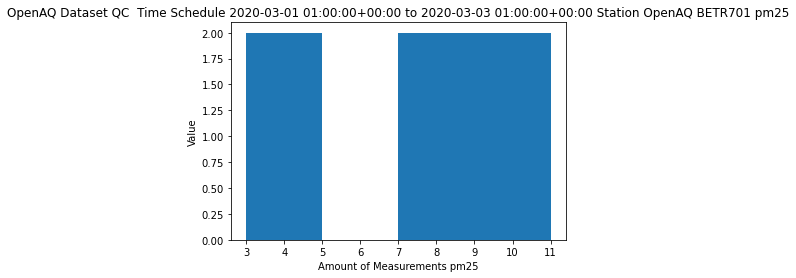

OpenAQ Dataset LinePlot


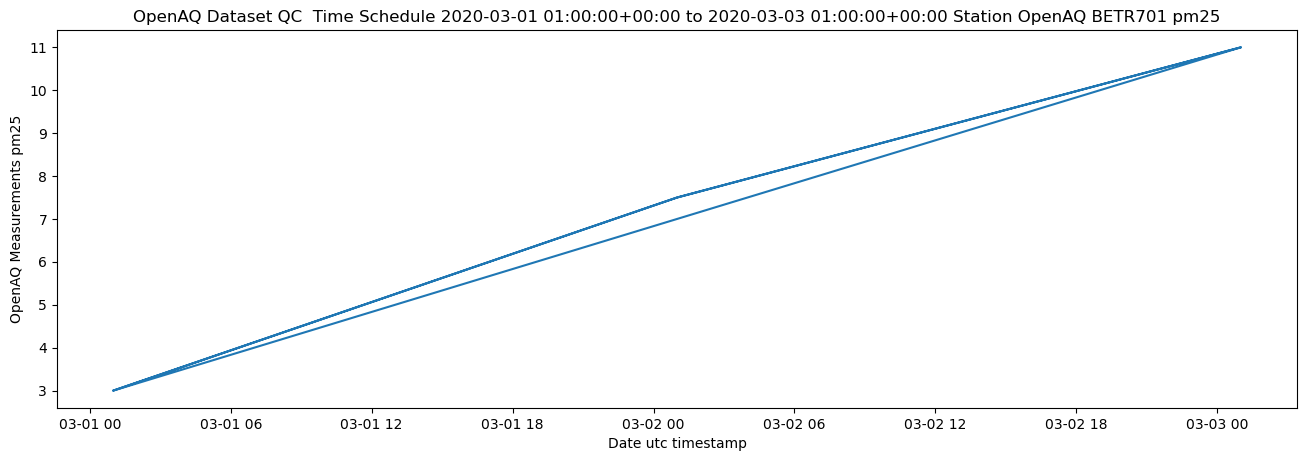

Histogram of OpenAQ Dataset from OpenAQ API download
36.5


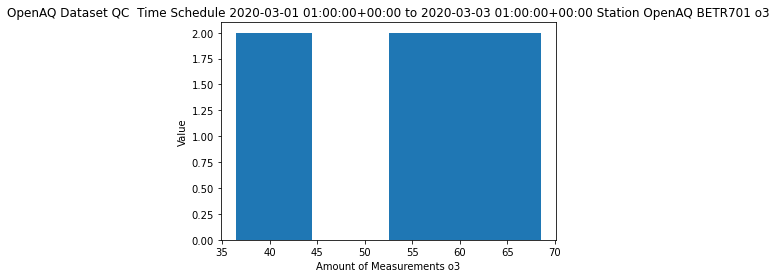

OpenAQ Dataset LinePlot


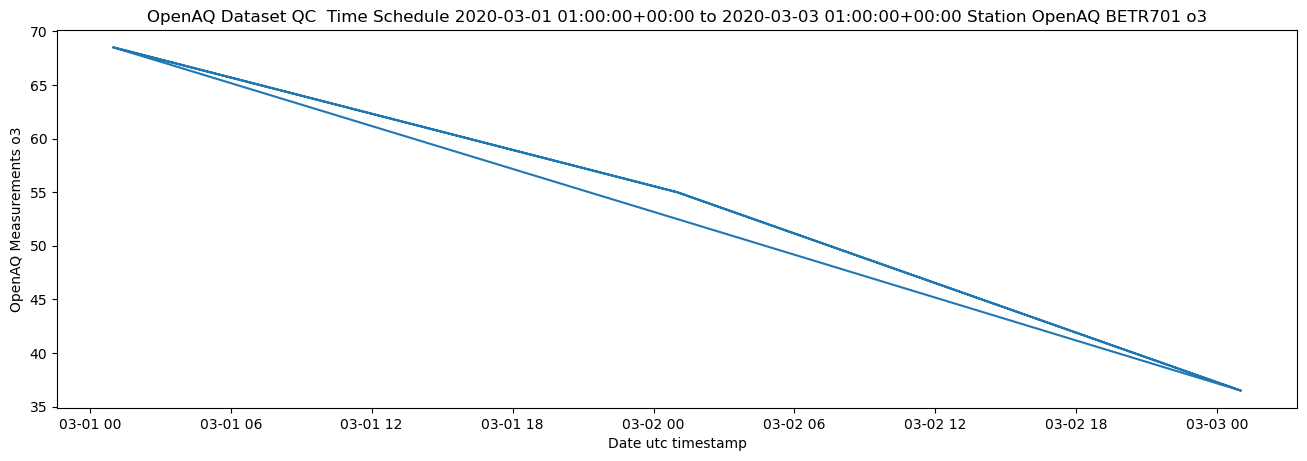

Histogram of OpenAQ Dataset from OpenAQ API download
6.0


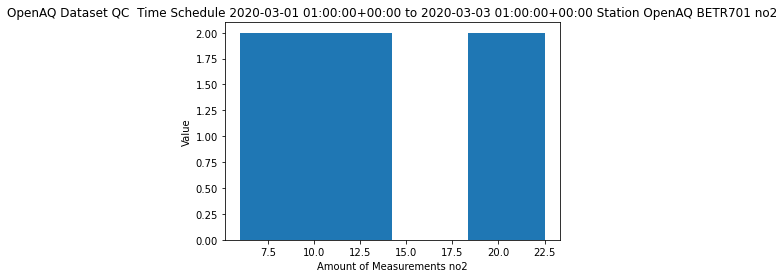

OpenAQ Dataset LinePlot


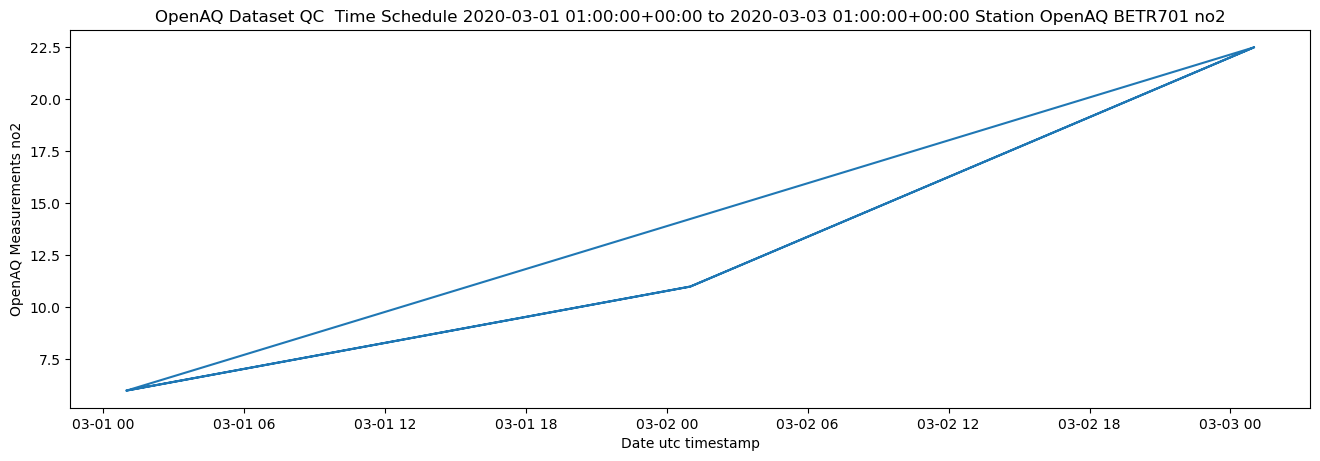

Histogram of OpenAQ Dataset from OpenAQ API download
0.195


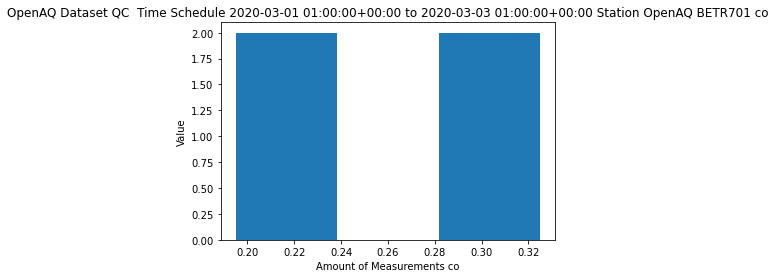

OpenAQ Dataset LinePlot


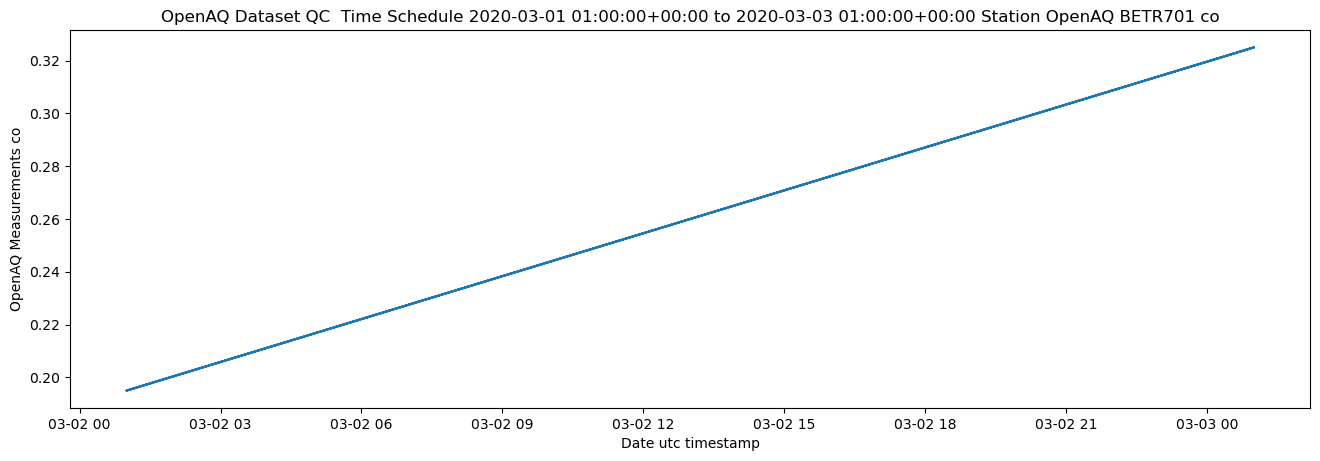

Histogram of OpenAQ Dataset from OpenAQ API download
10.2


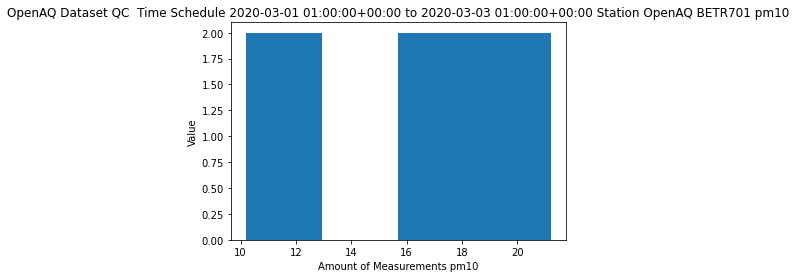

OpenAQ Dataset LinePlot


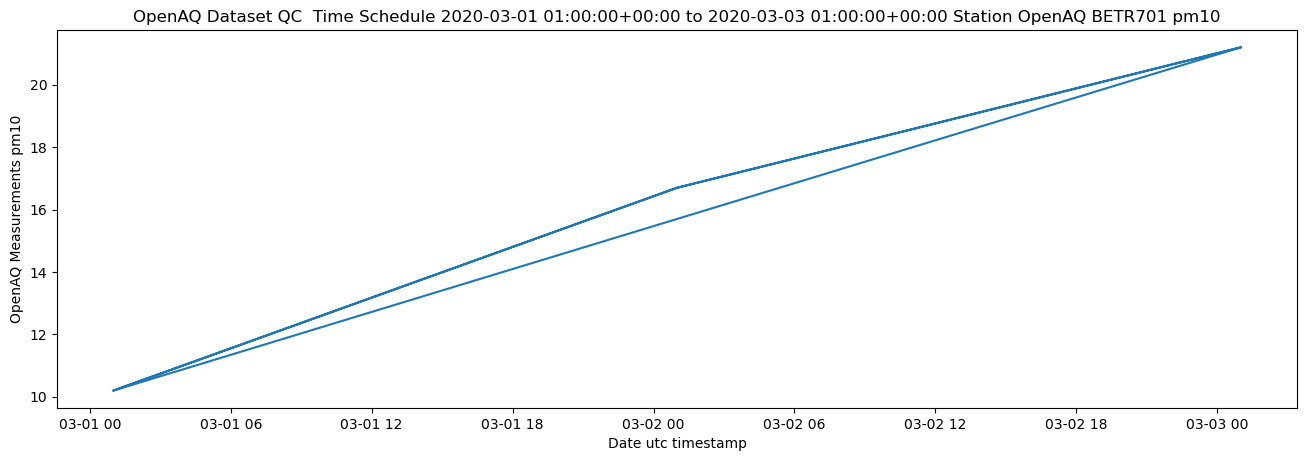

BETR710
Histogram of OpenAQ Dataset from OpenAQ API download
36.5


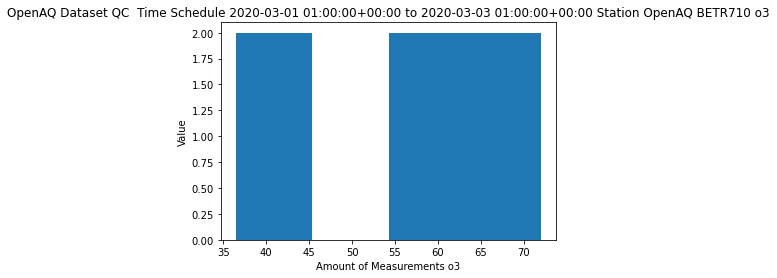

OpenAQ Dataset LinePlot


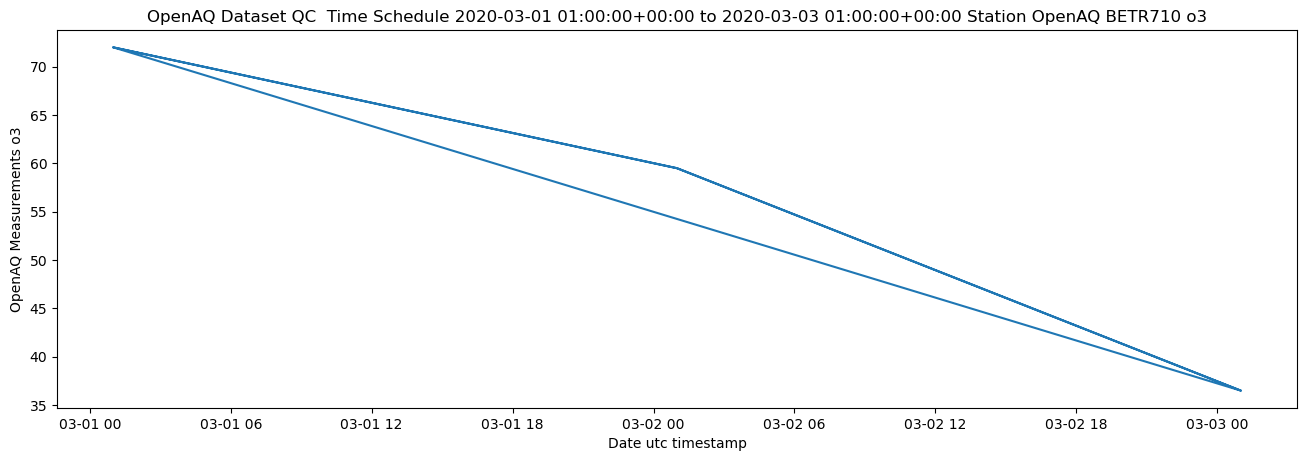

Histogram of OpenAQ Dataset from OpenAQ API download
3.5


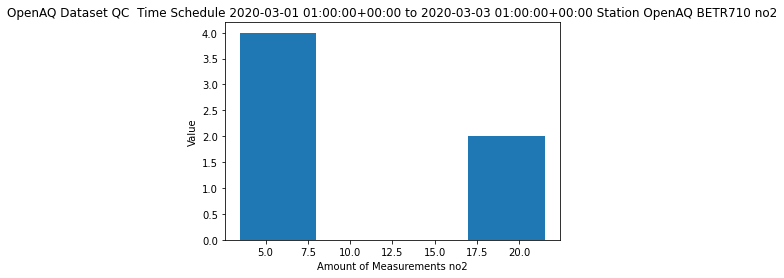

OpenAQ Dataset LinePlot


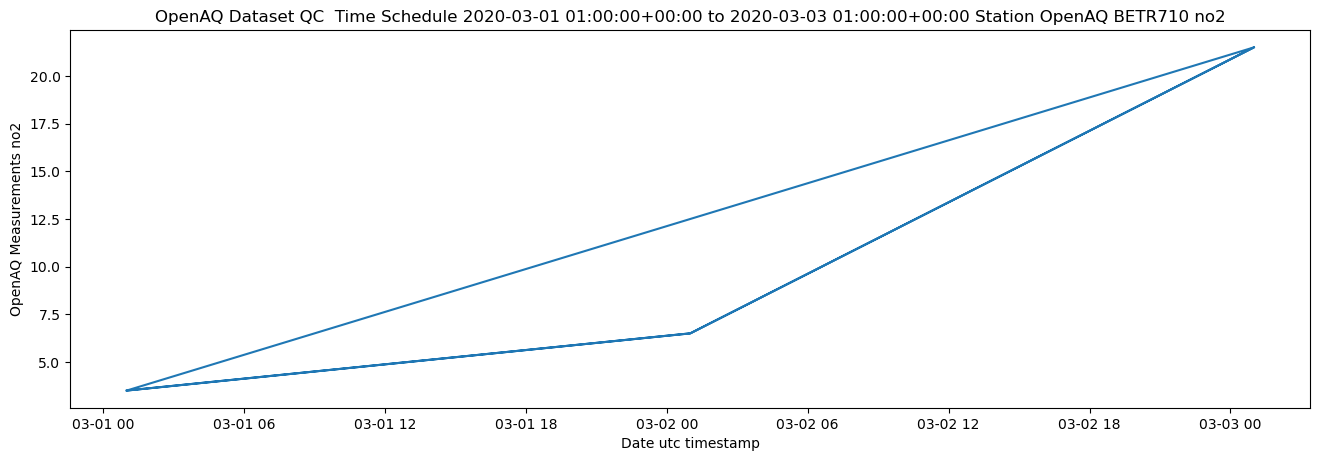

Histogram of OpenAQ Dataset from OpenAQ API download
9.7


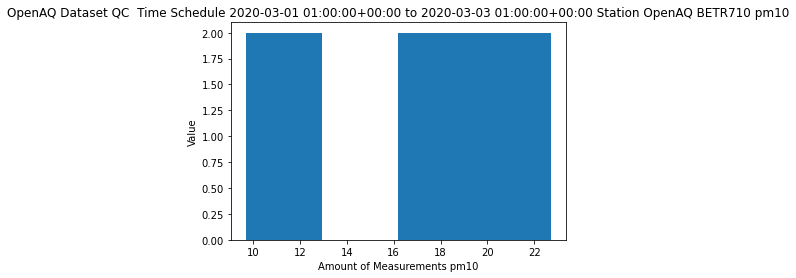

OpenAQ Dataset LinePlot


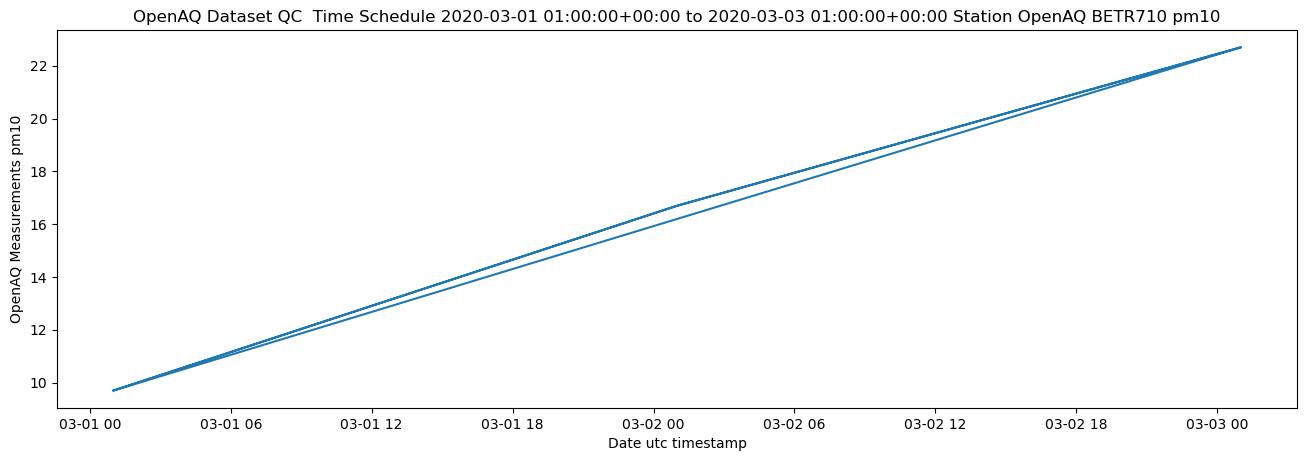

Histogram of OpenAQ Dataset from OpenAQ API download
3.0


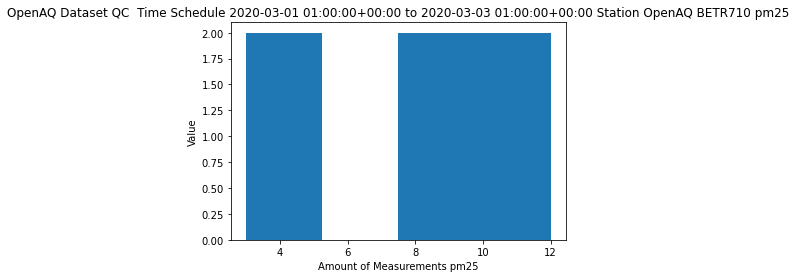

OpenAQ Dataset LinePlot


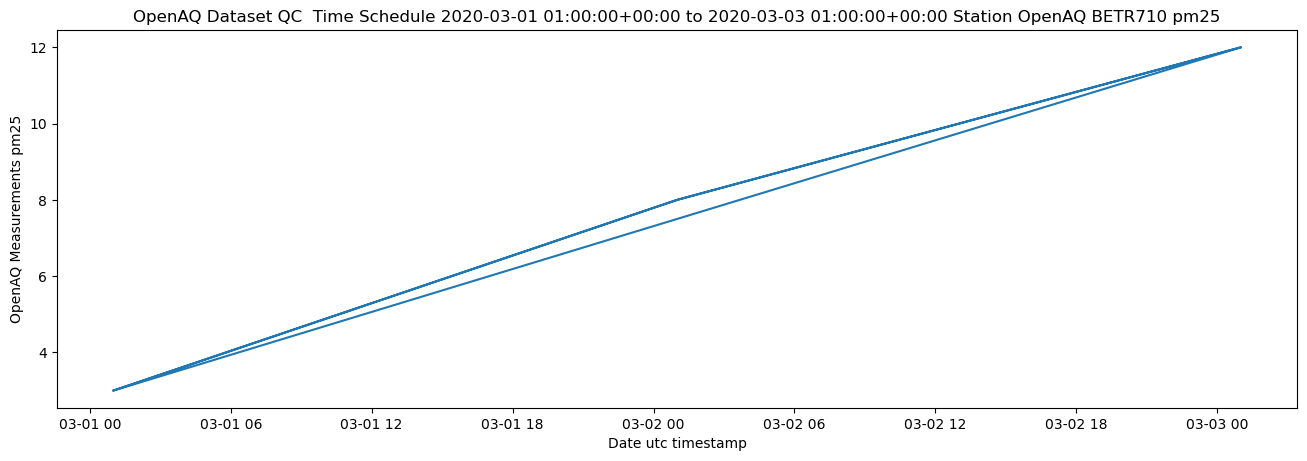

BETR702
Histogram of OpenAQ Dataset from OpenAQ API download
3.0


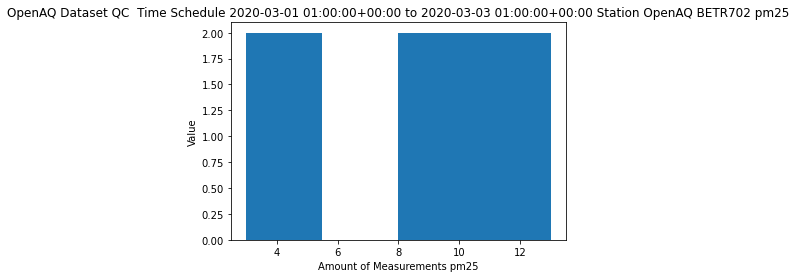

OpenAQ Dataset LinePlot


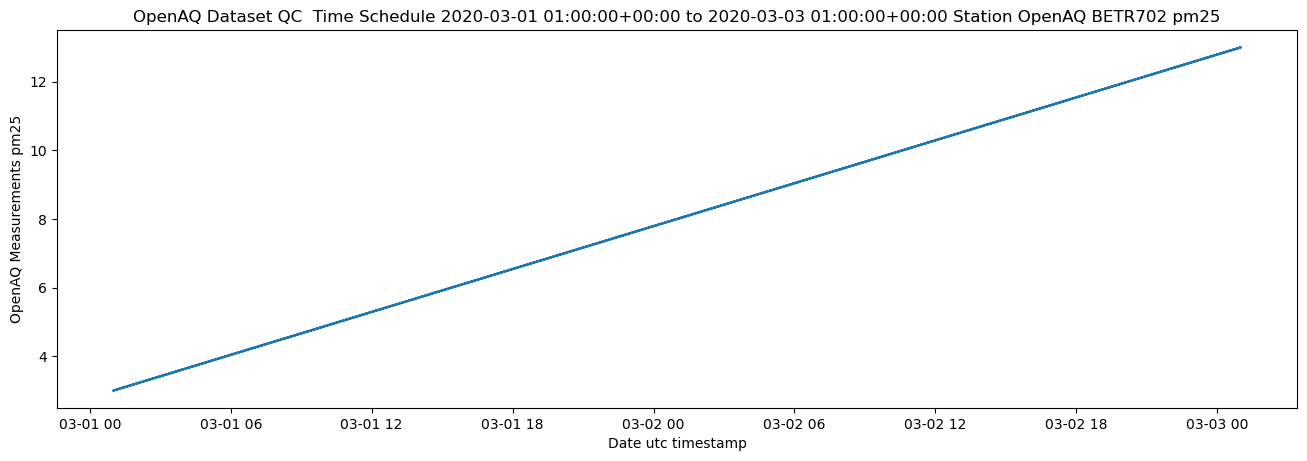

Histogram of OpenAQ Dataset from OpenAQ API download
6.0


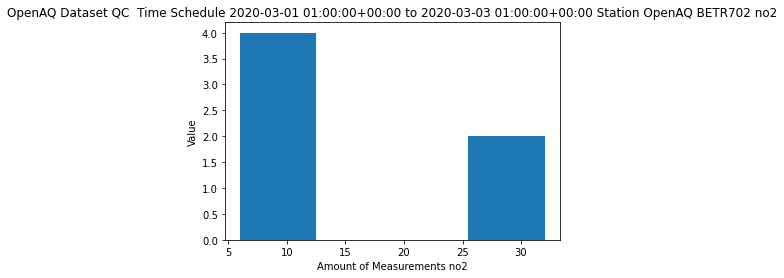

OpenAQ Dataset LinePlot


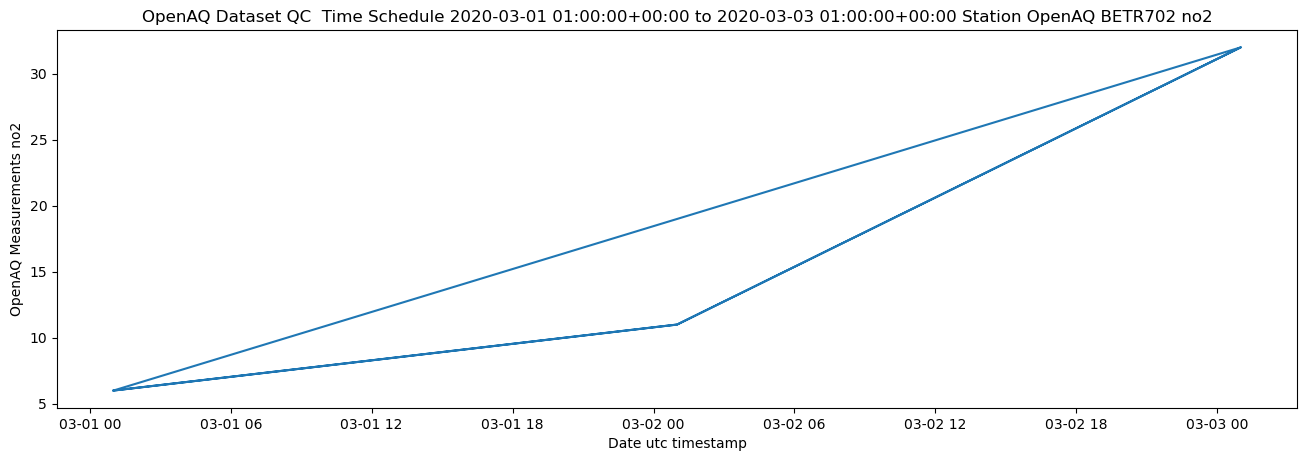

Histogram of OpenAQ Dataset from OpenAQ API download
9.7


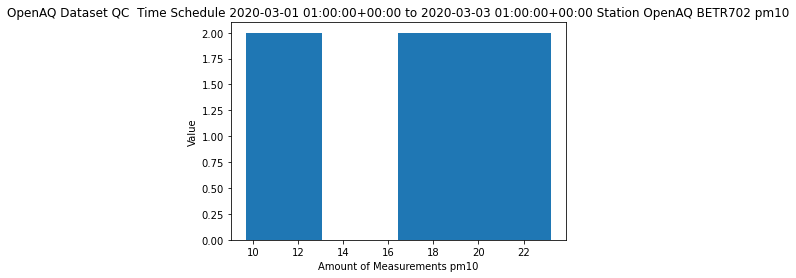

OpenAQ Dataset LinePlot


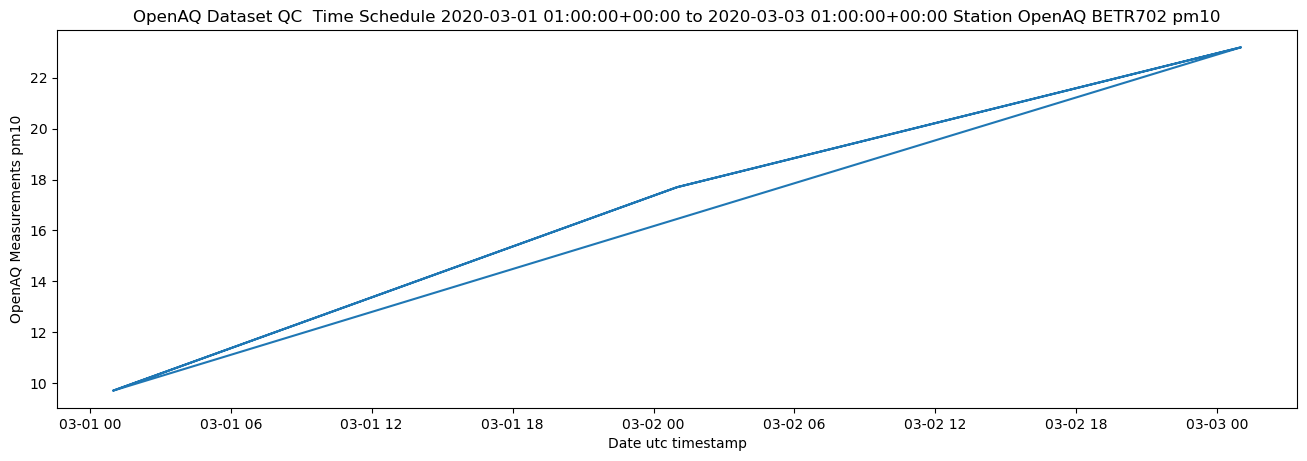

BETR721
Histogram of OpenAQ Dataset from OpenAQ API download
3.0


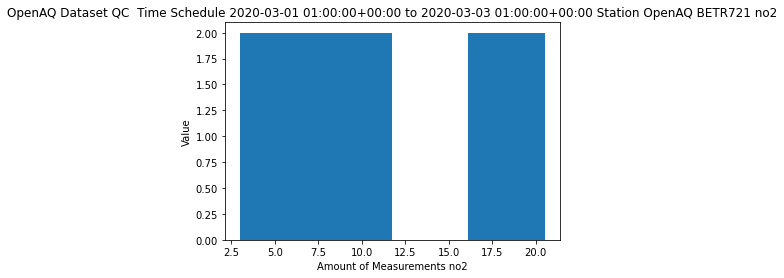

OpenAQ Dataset LinePlot


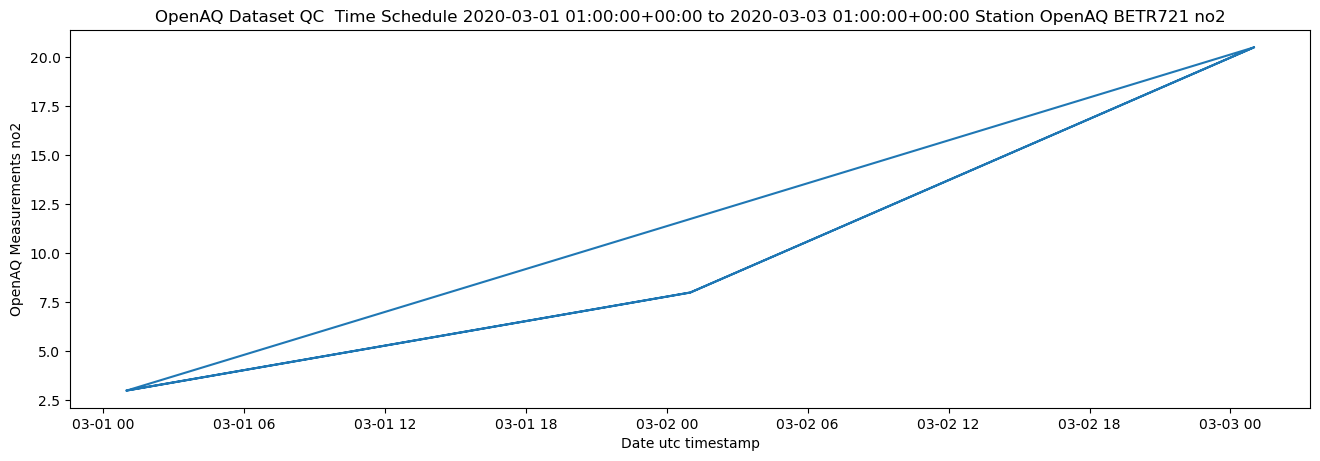

BETR731
Histogram of OpenAQ Dataset from OpenAQ API download
3.0


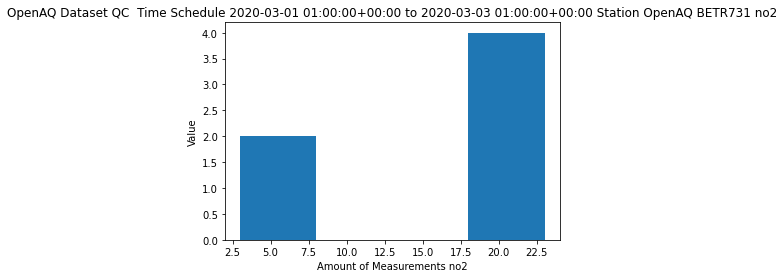

OpenAQ Dataset LinePlot


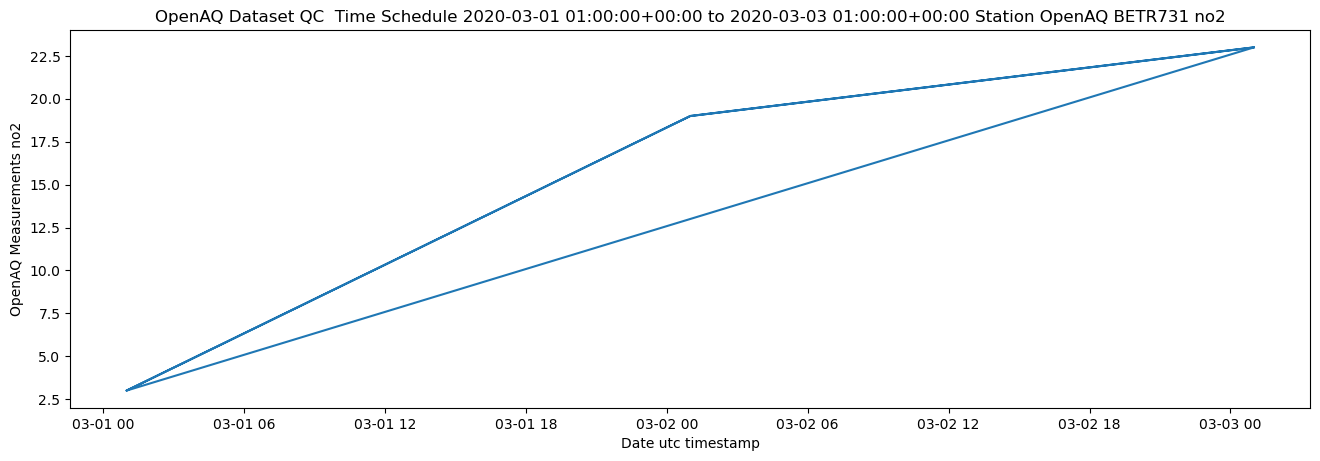

Histogram of OpenAQ Dataset from OpenAQ API download
10.2


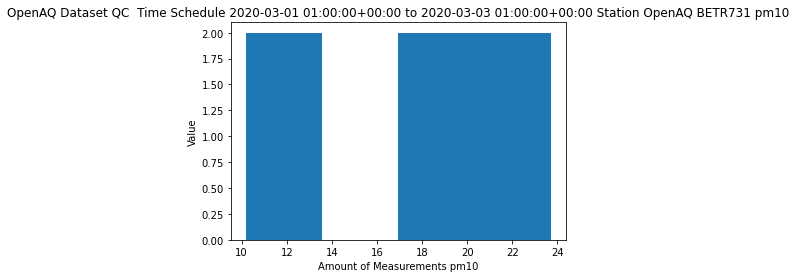

OpenAQ Dataset LinePlot


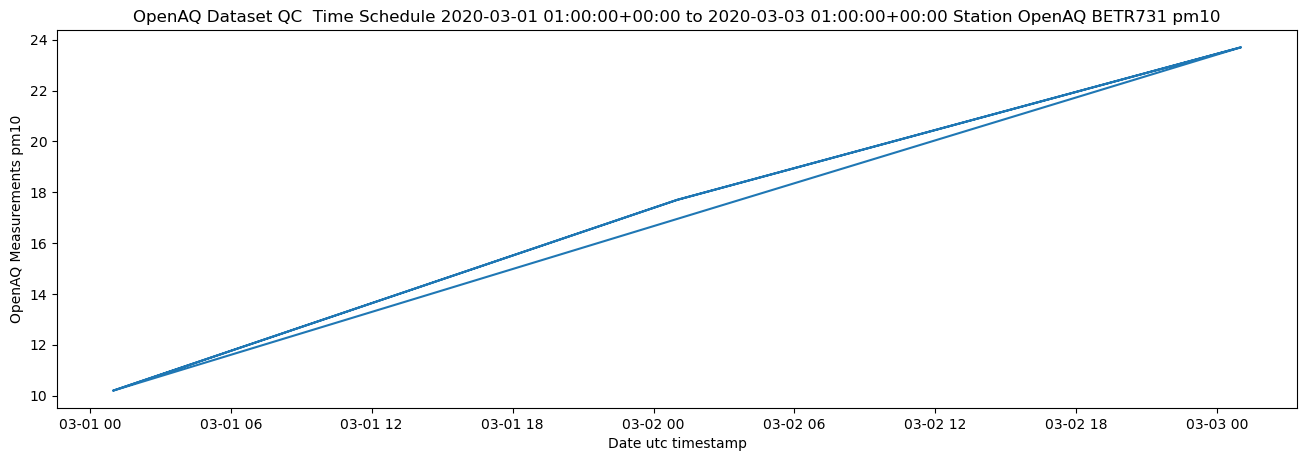

Histogram of OpenAQ Dataset from OpenAQ API download
3.0


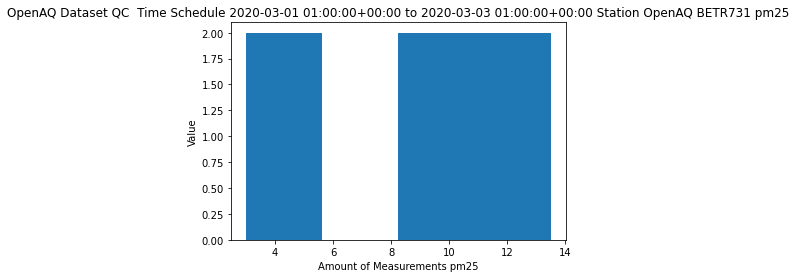

OpenAQ Dataset LinePlot


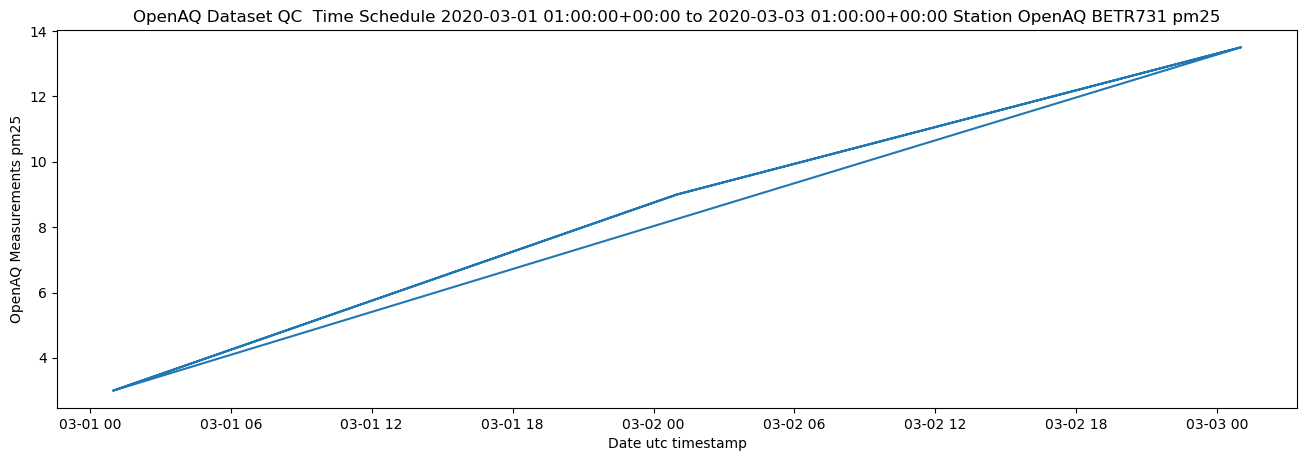

BETE716
Histogram of OpenAQ Dataset from OpenAQ API download
2.5


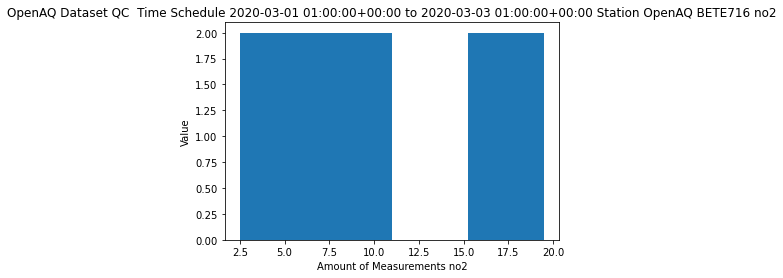

OpenAQ Dataset LinePlot


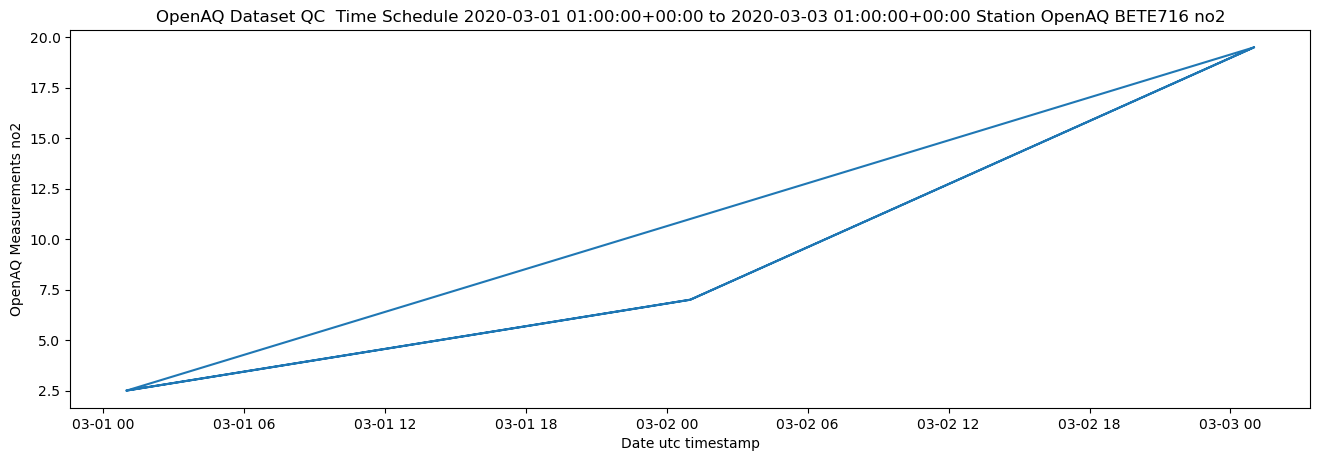

Completed Step 9 
>


In [49]:

#  Step 9 Plot OpenAQ Dataset to Line plot and Histogram
#
#   1 The iteration can be change to document every time it is processed 
#
#   iteration_OpenAQStations = '0'

print("  STEP 9 ")

print("********")

print("Graph of OpenAQ Dataset Measumrents")

iteration_OpenAQStations = '0'

OpenAQ_unit = str(ImportedOpenAQimport['unit'][0]) 

OpenAQDataset_VisualAnalytics = "OpenAQ Dataset QC" + " " + " Time Schedule " + str(dt_begin) + " to " + str(dt_end)

OpenAQDataset_VisualAnalytics_iteration = "OpenAQDataset QC " + " "  + " iteration " + iteration_OpenAQStations

OpenAQDataset = Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram_Unique(OpenAQAPIdataset, OpenAQStationunique, OpenAQDataset_VisualAnalytics, OpenAQDataset_VisualAnalytics_iteration)

print("Completed Step 9 ")

print(">")